Challenge 4
Salazar Luis -
Lagones Marco


In [51]:
# Importar las bibliotecas necesarias para el desafío
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [52]:
# Cargar los datos de ADMISSIONS.csv en un dataframe
df = pd.read_csv("ADMISSIONS.csv",index_col=[0])
df.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
row_id,,,,,,,,,,,,,,,,,,
12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [53]:
# Verificar la forma del dataframe (número de filas y columnas)
df.shape


(129, 18)

In [54]:
# Verificar los nombres de las columnas en el dataframe
df.columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'religion', 'marital_status', 'ethnicity',
       'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag',
       'has_chartevents_data'],
      dtype='object')

In [55]:
# Verificar si hay valores faltantes en el dataframe
df.isnull().any()

subject_id              False
hadm_id                 False
admittime               False
dischtime               False
deathtime                True
admission_type          False
admission_location      False
discharge_location      False
insurance               False
language                 True
religion                 True
marital_status           True
ethnicity               False
edregtime                True
edouttime                True
diagnosis               False
hospital_expire_flag    False
has_chartevents_data    False
dtype: bool

In [56]:
# Imprimir el número de valores únicos en cada columna
for col in df.columns:
    print(col, ":",df[col].nunique())

subject_id : 100
hadm_id : 129
admittime : 129
dischtime : 129
deathtime : 40
admission_type : 3
admission_location : 5
discharge_location : 10
insurance : 4
language : 5
religion : 10
marital_status : 6
ethnicity : 9
edregtime : 92
edouttime : 92
diagnosis : 95
hospital_expire_flag : 2
has_chartevents_data : 2


In [57]:
# Verificar si hay filas duplicadas en el dataframe
print("Número de filas duplicadas: ",df.duplicated().sum())

Número de filas duplicadas:  0


In [58]:
# Eliminar columnas irrelevantes del dataframe
columnas_irrelevantes = ['subject_id', 'hadm_id', 'admittime','dischtime', 'deathtime', 'admission_type', 'admission_location', 'discharge_location', 'edregtime', 'edouttime', 'has_chartevents_data']
df.drop(columns=columnas_irrelevantes, inplace=True)

In [59]:
# Eliminar filas con valores faltantes en el dataframe
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 12283 to 41092
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   insurance             78 non-null     object
 1   language              78 non-null     object
 2   religion              78 non-null     object
 3   marital_status        78 non-null     object
 4   ethnicity             78 non-null     object
 5   diagnosis             78 non-null     object
 6   hospital_expire_flag  78 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 4.9+ KB


In [60]:
# Verificar si hay algún valor faltante restante en el dataframe
df.isnull().any().sum()

0

In [61]:
# Seleccionar la variable objetivo y las variables de características
x = df.drop(columns=['hospital_expire_flag'])
y = df['hospital_expire_flag']

In [62]:
# Codificar las variables categóricas
categorical_columns = ['insurance', 'language', 'religion', 'marital_status', 'ethnicity', 'diagnosis']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

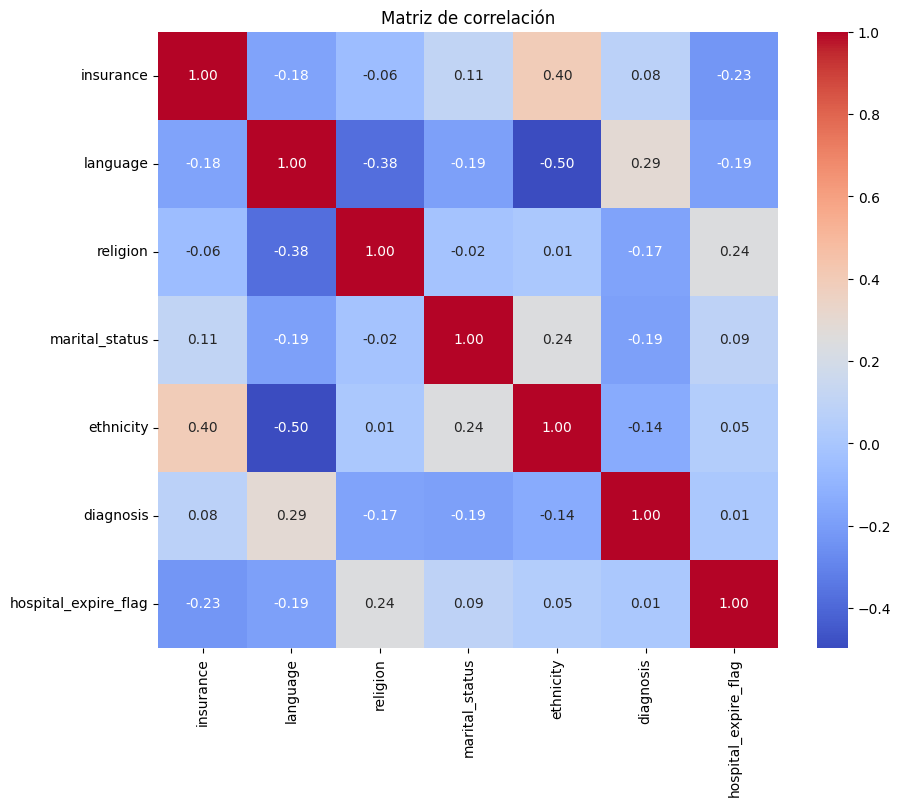

In [63]:
# Calcular la matriz de correlación
matriz_correlacion = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

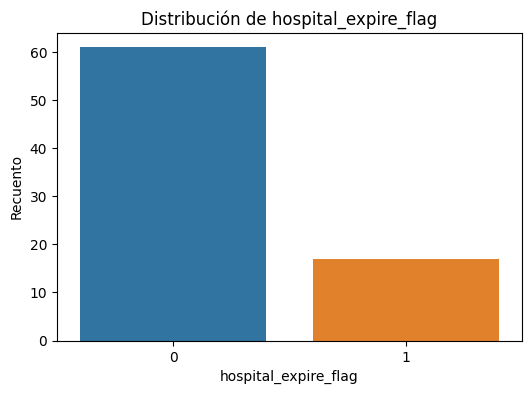

In [64]:
# Distribución de la variable objetivo 'hospital_expire_flag'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='hospital_expire_flag')
plt.title('Distribución de hospital_expire_flag')
plt.xlabel('hospital_expire_flag')
plt.ylabel('Recuento')
plt.show()

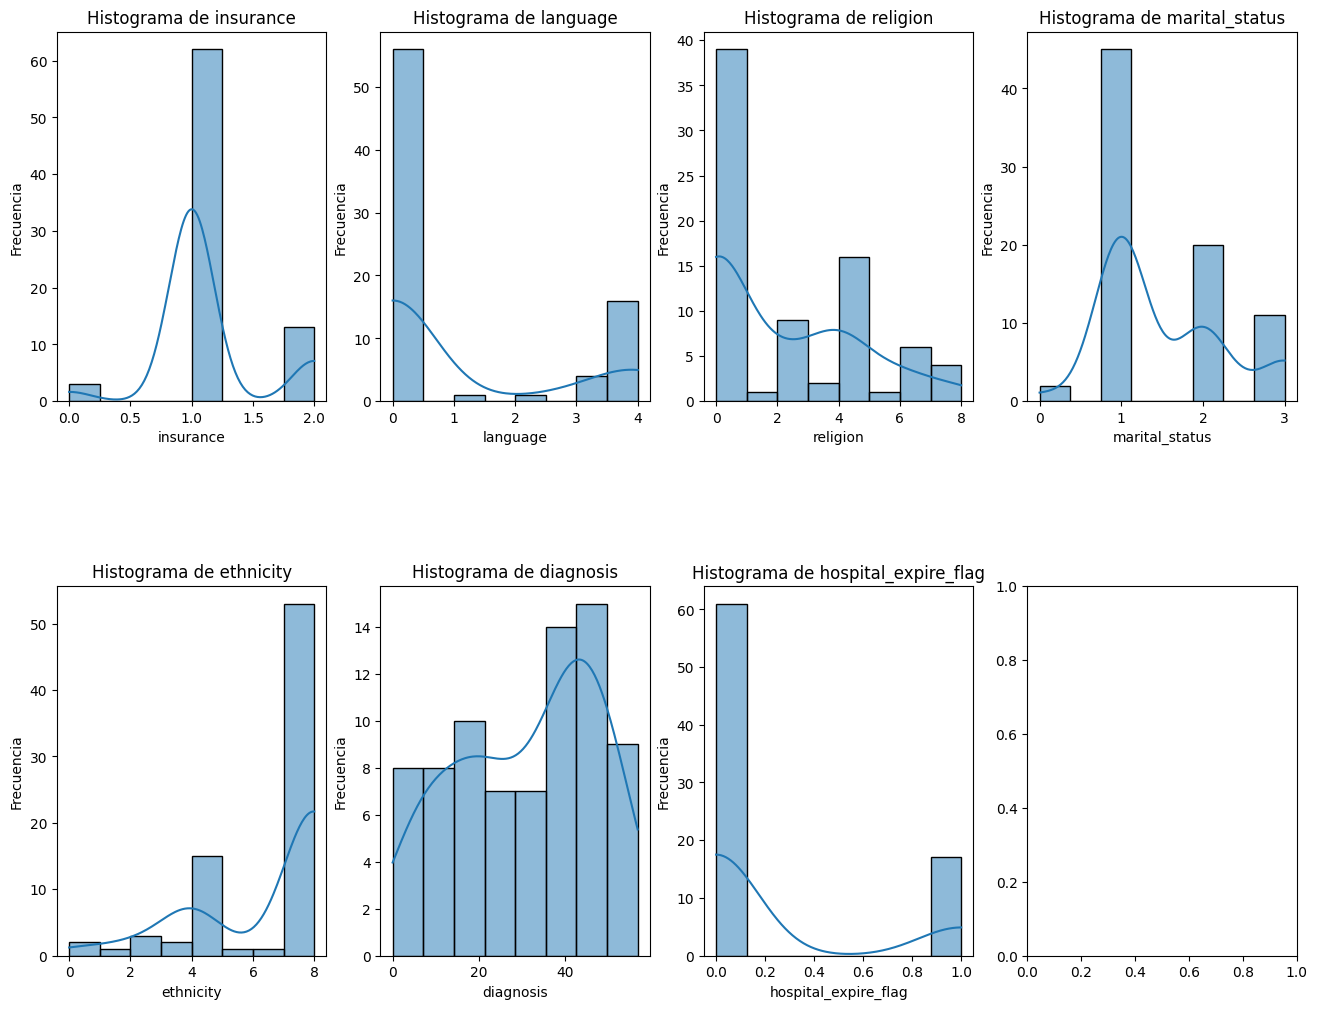

In [65]:
# Histogramas para las variables numéricas codificadas
numeric_columns = df.select_dtypes(include=[np.number]).columns
num_plots = len(numeric_columns)
fig, axes = plt.subplots(2, 4, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)
for i, column in enumerate(numeric_columns):
    row = i // 4
    col = i % 4
    sns.histplot(data=df, x=column, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histograma de {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frecuencia')

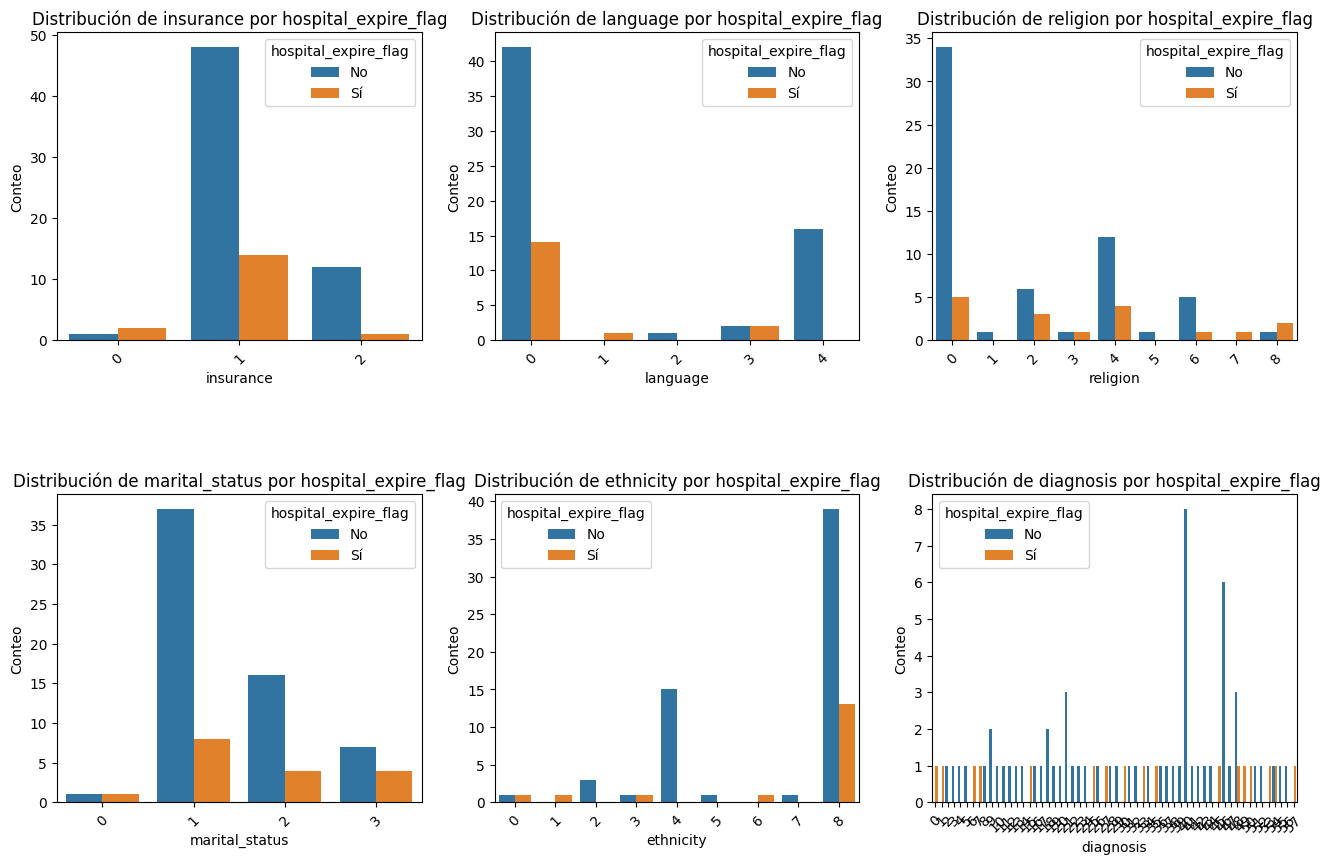

In [82]:
# Gráficos de barras para las variables categóricas codificadas
categorical_columns = ['insurance', 'language', 'religion', 'marital_status', 'ethnicity', 'diagnosis']
num_plots = len(categorical_columns)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)
# Iteramos para observar los datos
for i, column in enumerate(categorical_columns):
    row = i // 3
    col = i % 3
    sns.countplot(data=df, x=column, hue='hospital_expire_flag', ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {column} por hospital_expire_flag')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Conteo')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].legend(title='hospital_expire_flag', labels=['No', 'Sí'])
plt.show()

In [67]:
# Iterar sobre las columnas categóricas
for i, column in enumerate(categorical_columns):
    row = i // 3
    col = i % 3
    sns.countplot(data=df, x=column, hue='hospital_expire_flag', ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {column} por hospital_expire_flag')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Recuento')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].legend(title='hospital_expire_flag', labels=['No', 'Sí'])

plt.show()

In [68]:
# Definir las variables de características y la variable objetivo
x = df.drop(columns=['hospital_expire_flag'])
y = df['hospital_expire_flag']

In [69]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)

In [70]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
# Entrenar un modelo clásico de árbol de decisión
modelo_clasico = DecisionTreeClassifier(random_state=42)
modelo_clasico.fit(X_train, y_train)
predicciones_clasicas = modelo_clasico.predict(X_test)
f1_score_clasico = f1_score(y_test, predicciones_clasicas)
exactitud_clasica = modelo_clasico.score(X_test, y_test)

In [72]:
# Entrenar un modelo de random forest
modelo_rf = RandomForestClassifier(random_state=41)
modelo_rf.fit(X_train, y_train)
predicciones_rf = modelo_rf.predict(X_test)
f1_score_rf = f1_score(y_test, predicciones_rf)
exactitud_rf = modelo_rf.score(X_test, y_test)

In [73]:
# Entrenar un modelo de gradient boosting
modelo_gb = GradientBoostingClassifier(random_state=41)
modelo_gb.fit(X_train, y_train)
predicciones_gb = modelo_gb.predict(X_test)
f1_score_gb = f1_score(y_test, predicciones_gb)
exactitud_gb = modelo_gb.score(X_test, y_test)

In [74]:
# Imprimir la exactitud de los modelos
print("EXACTITUD\n")
print("Exactitud del modelo clásico (Árbol de decisión): ", exactitud_clasica)
print("Exactitud del modelo de ensemble 1 (Random Forest): ", exactitud_rf)
print("Exactitud del modelo de ensemble 2 (Gradient Boosting): ", exactitud_gb, "\n")

EXACTITUD

Exactitud del modelo clásico (Árbol de decisión):  0.6666666666666666
Exactitud del modelo de ensemble 1 (Random Forest):  0.7083333333333334
Exactitud del modelo de ensemble 2 (Gradient Boosting):  0.7083333333333334 



In [75]:

# Imprimir el F1-score de los modelos como una métrica adicional
print("\nF1-SCORE\n")
print("F1-score del modelo clásico (Árbol de decisión): ",f1_score_clasico)
print("F1-score del modelo de ensemble (Random Forest): ", f1_score_rf)
print("F1-score del modelo de ensemble (Gradient Boosting): ",f1_score_gb, "\n")


F1-SCORE

F1-score del modelo clásico (Árbol de decisión):  0.2
F1-score del modelo de ensemble (Random Forest):  0.2222222222222222
F1-score del modelo de ensemble (Gradient Boosting):  0.2222222222222222 



In [76]:
# Identificar las características más importantes
important_features = modelo_rf.feature_importances_
sorted_indices = np.argsort(important_features)[::-1]

In [77]:
# Imprimir las 5 características más importantes
top_n = 5
top_features = x.columns[sorted_indices[:top_n]]
print(f"Las {top_n} características más importantes son:\n")
for feature in top_features:
    print(feature)


Las 5 características más importantes son:

diagnosis
religion
marital_status
language
ethnicity


In [78]:
# Imprime el reporte de clasificación para el modelo clásico (Árbol de decisión)
print("\nReporte de Clasificación del modelo clásico (Árbol de decisión):\n")
print(classification_report(y_test, predicciones_clasicas))


Reporte de Clasificación del modelo clásico (Árbol de decisión):

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.25      0.17      0.20         6

    accuracy                           0.67        24
   macro avg       0.50      0.50      0.49        24
weighted avg       0.62      0.67      0.64        24



In [79]:
# Imprime el reporte de clasificación para el modelo de random forest
print("\nReporte de Clasificación del modelo Random Forest:\n")
print(classification_report(y_test, predicciones_rf))


Reporte de Clasificación del modelo Random Forest:

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.33      0.17      0.22         6

    accuracy                           0.71        24
   macro avg       0.55      0.53      0.52        24
weighted avg       0.65      0.71      0.67        24



In [80]:
# Imprime el reporte de clasificación para el modelo de gradient boosting
print("\nReporte de Clasificación del modelo Gradient Boosting:\n")
print(classification_report(y_test, predicciones_gb))


Reporte de Clasificación del modelo Gradient Boosting:

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.33      0.17      0.22         6

    accuracy                           0.71        24
   macro avg       0.55      0.53      0.52        24
weighted avg       0.65      0.71      0.67        24



El código desarrollado proporciona un análisis completo y una implementación de modelos de aprendizaje automático para predecir la variable "hospital_expire_flag" a partir del conjunto de datos "ADMISSIONS.csv". Como conclusiones se tiene:

Preparación de datos:

Se han eliminado columnas irrelevantes que no se utilizarán para el modelado.
Además, se eliminaron filas con valores faltantes.
Por último, se codificaron las variables categóricas utilizando el método LabelEncoder.

Análisis exploratorio de datos:

Para el análsis, primeros se motraron la forma, los nombres de columnas y la presencia de valores faltantes en el conjunto de datos.
Seguido de ello se calculó y mostró la matriz de correlación para analizar las relaciones entre las variables.
Añadido a ello, se mostraron gráficos de distribución e histogramas para comprender la distribución y los patrones de las variables.

Selección de características:

Se identificaron las características más importantes utilizando el modelo de random forest. A partir de dicho modelo, se mostraron las 5 características más importantes.

Modelado y evaluación de los modelos de aprendizaje automático:

Se dividieron los datos en conjuntos de entrenamiento y prueba, usando un test size de 0.3 y un random state igual a 41.
Despues, se escalaron las características utilizando StandardScaler.
Finalmente, se entrenaron tres modelos de clasificación: árbol de decision, random forest y gradient boosting, apartir de los cuales se desarrrolaron predicciones por cada modelo y se evaluó su exactitud y el F1-score, siendo el mdodelo de Random Forest y Gradient Bosting quienes obtuvieron mejores métricas.
En resumen, para el challenge 4, el código desarrolado muestra el procesamiento de datos, análisis exploratorio de datos, modelado de aprendizaje automático y evaluación de modelos; todo ello junto con las características más importantes que contribuyen a las predicciones del modelo.